In [2]:
#import packages
import pandas as pd
import nltk
import numpy as np
from numpy import random as npr
import time
import string
import sklearn
#from itertools import chain, imap
#nltk.download('punkt')
#nltk.download("stopwords")
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import re
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD

In [3]:
#read in data
df1 = pd.read_json('C:/Users/tommy/Downloads/final_50k_221118.json', lines=True)


In [4]:
df1

,awesome_biz_id,business_name,state,city,zip,content,posted_date,stars,webpage_url,menu_url,customer_rating_index,visibility_index,open_hours_raw,business_characteristics,is_entertainment,is_traffic
0,biz_000000,Trattoria Bruno,CA,San Francisco,94107.0,COVID-19 DELIVERY I caved. I'm not a fan of fo...,2020-07-29,4.0,None,None,NaN,2.31,"{'friday': [{'closedHours': '2100', 'openHours...","[""Third Party Food Delivery""]",False,True
1,biz_000000,Trattoria Bruno,CA,San Francisco,94107.0,4.5 stars I'm in carb heaven! Trattoria Bruno ...,2020-08-07,5.0,None,None,NaN,2.31,"{'friday': [{'closedHours': '2100', 'openHours...","[""Third Party Food Delivery""]",False,True
2,biz_000001,Remixed By Burnout,CA,Riverside,92506.0,Small Business Saturday and I went in to check...,2021-12-05,5.0,None,None,NaN,3.19,"{'friday': [{'closedHours': '1800', 'openHours...","[""Used Goods"",""Wheelchair Accessible"",""Accepts...",False,True
3,biz_000002,Sangio's Deli,CA,Temecula,92592.0,Food is prepared while you wait and large grou...,2019-11-06,5.0,http://cougarvineyards.com/deli,https://www.allmenus.com/ca/temecula/841906-sa...,4.33,2.98,"{'friday': [{'closedHours': '1800', 'openHours...","[""Take Out"",""Wheelchair Accessible"",""Wifi Avai...",False,True
4,biz_000002,Sangio's Deli,CA,Temecula,92592.0,Food is prepared while you wait and large grou...,2019-11-06,5.0,http://cougarvineyards.com/deli,https://www.allmenus.com/ca/temecula/841906-sa...,4.33,2.98,"{'friday': [{'closedHours': '1800', 'openHours...","[""Take Out"",""Wheelchair Accessible"",""Wifi Avai...",False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487940,biz_040802,Jessica's Party Supplies,CA,Los Angeles,90059.0,They cheated me and over charged me. They made...,2020-08-02,1.0,None,None,4.30,3.04,"{'friday': [{'closedHours': '1800', 'openHours...","[""Rental"",""Wheelchair Accessible"",""Alcohol""]",False,False
487941,biz_040802,Jessica's Party Supplies,CA,Los Angeles,90059.0,Very efficient and nice store worth visiting a...,2020-08-15,5.0,None,None,4.30,3.04,"{'friday': [{'closedHours': '1800', 'openHours...","[""Rental"",""Wheelchair Accessible"",""Alcohol""]",False,False
487942,biz_040802,Jessica's Party Supplies,CA,Los Angeles,90059.0,🤦🏽 ♀️I was at ROCK BOTTOM BOUTIQUE!.. but the ...,2020-09-05,1.0,None,None,4.30,3.04,"{'friday': [{'closedHours': '1800', 'openHours...","[""Rental"",""Wheelchair Accessible"",""Alcohol""]",False,False
487943,biz_040802,Jessica's Party Supplies,CA,Los Angeles,90059.0,Prices are very reasonable and customer servic...,2020-09-30,4.0,None,None,4.30,3.04,"{'friday': [{'closedHours': '1800', 'openHours...","[""Rental"",""Wheelchair Accessible"",""Alcohol""]",False,False


In [5]:
#Shuffle the data and take the first 30000 rows
df_shuffled = df1.sample(frac=1, random_state=39).reset_index(drop=True)
df2 = df_shuffled[0:30000]

In [6]:
df2

,awesome_biz_id,business_name,state,city,zip,content,posted_date,stars,webpage_url,menu_url,customer_rating_index,visibility_index,open_hours_raw,business_characteristics,is_entertainment,is_traffic
0,biz_002408,7-Eleven,CA,San Jose,95124.0,The inside of the fridges are absolutely disgu...,2020-12-26,1.0,None,None,3.03,3.18,"{'friday': [{'closedHours': '24hours', 'openHo...","[""Delivery"",""Hours Open 24 Indicator"",""Tobacco...",True,True
1,biz_036843,Mr. Lumpia And More,CA,Visalia,93277.0,"Gone here twice at the Visalia Farmers Market,...",2019-12-15,5.0,None,None,3.99,2.50,None,"[""Mobile Vendor"",""Catering"",""Accepts Credit Ca...",False,True
2,biz_045947,Duke Lite Smoke Shop,CA,Glendale,91202.0,Outstanding place. Amazing smoke shop that ope...,2021-09-29,5.0,None,None,4.94,2.85,None,"[""Tobacco Store"",""Tobacco"",""E-Cigarettes""]",True,False
3,biz_004755,Krispy Rice,CA,Studio City,91604.0,"The rice was brick hard, and the fish was quit...",2021-08-02,1.0,None,None,2.41,2.66,None,"[""Raw Seafood Served"",""Delivery"",""Wheelchair A...",False,True
4,biz_034895,Hero Complex Gallery,CA,Los Angeles,90019.0,I've purchased several prints from Hero Comple...,2019-10-14,5.0,None,None,4.41,3.56,"{'friday': [{'closedHours': '1800', 'openHours...","[""Internet Sales"",""Wheelchair Accessible"",""Acc...",False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,biz_004224,Far Western Liquor,CA,Orcutt,93455.0,Best place for ice cold refreshments of many v...,2019-09-15,5.0,http://farwesternliquor.com,http://places.singleplatform.com/far-western-l...,3.88,3.21,"{'friday': [{'closedHours': '2200', 'openHours...","[""Liquor Store"",""Accepts NFC Mobile Payments"",...",False,True
29996,biz_009848,Chicago For Ribs,CA,Redondo Beach,90277.0,They were a bit off their game this day. Wasn'...,2019-04-10,4.0,http://chicagoforribs.com,http://www.chicagoforribs.com/,4.20,3.20,"{'friday': [{'closedHours': '2200', 'openHours...","[""Wheelchair Accessible"",""Wifi Available"",""Alc...",False,True
29997,biz_038071,Avenu,CA,Coronado,92118.0,The older lady that works here is very rude. T...,2020-07-03,1.0,http://avenuboutique.com,None,3.81,3.50,"{'friday': [{'closedHours': '1900', 'openHours...","[""Safety Apparel"",""Accepts NFC Mobile Payments...",False,True
29998,biz_008626,Mulberrys - San Carlos Dry Cleaners,CA,San Carlos,94070.0,The staff are very professional also friendly....,2019-05-21,5.0,http://mulberryscleaners.com,None,4.71,3.44,"{'friday': [{'closedHours': '1900', 'openHours...","[""Delivery"",""Online Customer Portal"",""Collects...",False,True


In [7]:
#Combine comments by unique business id, keep only labels, business name, and comments
df3 = df2.groupby(df2["awesome_biz_id"],as_index=False).agg({"content":' '.join,"business_name":"first","is_entertainment":"max","is_traffic":"max"})

In [8]:
df3

,awesome_biz_id,content,business_name,is_entertainment,is_traffic
0,biz_000003,They do not make authentic Italian calzones. O...,Calzone,False,True
1,biz_000005,They are scammers!!! DO NOT BUY PRODUCTS FROM ...,cheebapotshop.com,True,True
2,biz_000009,Just opened the paper bag to find a burnt croi...,Perk Coffee Bar,False,True
3,biz_000014,Needed a quick car wash!!! In the sign $4.19 i...,MB KAZMO OIL CO,False,True
4,biz_000020,"This service is convenient, easy, and fast. Li...",Wash-N-Deliver,False,True
...,...,...,...,...,...
18719,biz_049988,"Vonsland! I swear, THIS IS ACTUALLY A SMALL TO...",Lucky Liquor Market,False,False
18720,biz_049993,"This is a fun place to relax, create a paintin...",Pinot's Palette,False,False
18721,biz_049994,3 stars for food and service. I have a friend ...,Diem Hen,False,False
18722,biz_049995,It's wasn't bad as all. It's very slow and eve...,Empire Hookah Lounge,True,False


In [9]:
#Extract labels and predictors into separate dataframes
label = ["is_entertainment","is_traffic"]
labeldf = df3[["is_entertainment","is_traffic"]]
df4 = df3[["business_name","content"]]
name = ["business_name","content"]

In [10]:
print(labeldf)
print("Entertainment: True:",sum(labeldf["is_entertainment"]),"False:",len(labeldf["is_entertainment"])-sum(labeldf["is_entertainment"]))
print("Minority percentage:",sum(labeldf["is_entertainment"])/len(labeldf["is_entertainment"])*100)
print("Traffic: True:",sum(labeldf["is_traffic"]),"False:",len(labeldf["is_traffic"])-sum(labeldf["is_traffic"]))
print("Minority percentage:",(1-sum(labeldf["is_traffic"])/len(labeldf["is_traffic"]))*100)
print(df4)

       is_entertainment  is_traffic
0                 False        True
1                  True        True
2                 False        True
3                 False        True
4                 False        True
...                 ...         ...
18719             False       False
18720             False       False
18721             False       False
18722              True       False
18723              True       False

[18724 rows x 2 columns]
Entertainment: True: 2590 False: 16134
Minority percentage: 13.832514419995729
Traffic: True: 15356 False: 3368
Minority percentage: 17.987609485152745
                    business_name  \
0                         Calzone   
1               cheebapotshop.com   
2                 Perk Coffee Bar   
3                 MB KAZMO OIL CO   
4                  Wash-N-Deliver   
...                           ...   
18719         Lucky Liquor Market   
18720             Pinot's Palette   
18721                    Diem Hen   
18722        Empire 

In [11]:
#Tokenize comments and business names
dic1 = {}
WORD = re.compile(r'\w+')
def regTokenize(text):
    words = WORD.findall(text)
    return words
for i in [0,1]:
    arrx = []
    for j in range(0,len(df4[name[i]])):
        listx = regTokenize(df4[name[i]][j])
        arrx.append(listx)
    dic1[name[i]] = arrx

In [12]:
#Filter stopwords and stem
stop_words = set(stopwords.words("english"))
for i in range(len(string.punctuation)):    
    stop_words.add(string.punctuation[i])
stop_words.add("'s")
stop_words.add(".....")
stemmer = PorterStemmer()
for i in [0,1]:
    arrc = []
    for j in range(0,len(dic1[name[i]])):
        flist = []
        for z in dic1[name[i]][j]:
            if z.casefold() not in stop_words:
                flist.append(stemmer.stem(z))
        arrc.append(" ".join(flist))
    dic1[name[i]] = arrc

In [13]:
dic1

{'business_name': ['calzon',
  'cheebapotshop com',
  'perk coffe bar',
  'MB kazmo oil CO',
  'wash N deliv',
  'shell',
  'domino pizza',
  'three root mexican cocina',
  'exxon',
  'fat citi',
  'cigarett',
  'sephora',
  'chevron extra mile',
  'retro respawn',
  'express blind',
  'california chicken QQ cafe',
  'papa murphi',
  'ogden cleaner malibu',
  'chevron',
  'circl market',
  'dean clean mobil dri clean',
  'rapid 76',
  'Dr pharmaci Rx',
  'chessco mexican cuisin stew',
  'costa mesa speedway',
  'one stop corner market',
  'cv pharmaci',
  'SR food liquor',
  '7 eleven',
  'loft',
  '7 eleven',
  'cv pharmaci',
  'El chilito',
  'cal tamal',
  'dickey barbecu pit',
  'olei fusion cuisin',
  'daom korean bbq tofu',
  'cv',
  'frou frou',
  'king tobacco',
  'cosmo prof',
  'El paissa mexican grill',
  'budget uniform rental',
  'smoke',
  'central mart',
  'way right med order adderal ambien xanax tramadol',
  'vantag',
  'lightbox café',
  'roll deliveri servic',
  'sol

In [14]:
#Generate TF-IDF matrix and combine the results of both business name and contents
tf_idf_model  = TfidfVectorizer(min_df=0.001)
bustf = dic1["business_name"]
tf_idf_vector1 = tf_idf_model.fit_transform(bustf)
tf_idf_array1 = tf_idf_vector1.toarray()
contf = dic1["content"]
tf_idf_vector2 = tf_idf_model.fit_transform(contf)
tf_idf_array2 = tf_idf_vector2.toarray()
X = np.hstack((tf_idf_array1,tf_idf_array2))

In [15]:

# SVD dimension reduction basic set up
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=X.shape[1]-1)
X_svd = svd.fit(X)
var_explained = svd.explained_variance_ratio_.sum()
svd_var_ratios = svd.explained_variance_ratio_

# Create a function to select the optimal number of components for svd
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    index = 0
    while index < len(var_ratio)-5:
        
        # Add the explained variance to the total
        #total_variance += explained_variance[]
        total_variance += var_ratio[index]
        # Add one to the number of components
        n_components += 5
        print(total_variance)
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
    '''# For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break'''
            
    # Return the number of components
    return n_components

# Refit the svd with the optimal number of components
svd_comp = select_n_components(svd_var_ratios, 0.90)
print(svd_comp)
svd = TruncatedSVD(n_components=svd_comp)
X_svd = svd.fit(X)
var_explained = svd.explained_variance_ratio_.sum()
print(var_explained)

# TF-IDF with svd
dfsvd = svd.fit_transform(X)

0.005256432482890529
0.010512864965781058
0.015769297448671588
0.021025729931562116
0.026282162414452644
0.031538594897343175
0.03679502738023371
0.04205145986312424
0.04730789234601477
0.0525643248289053
0.05782075731179583
0.06307718979468636
0.06833362227757689
0.07359005476046741
0.07884648724335794
0.08410291972624846
0.08935935220913899
0.09461578469202951
0.09987221717492004
0.10512864965781056
0.11038508214070109
0.11564151462359161
0.12089794710648213
0.12615437958937267
0.1314108120722632
0.13666724455515375
0.1419236770380443
0.14718010952093483
0.15243654200382536
0.1576929744867159
0.16294940696960644
0.16820583945249698
0.17346227193538752
0.17871870441827806
0.1839751369011686
0.18923156938405913
0.19448800186694967
0.1997444343498402
0.20500086683273075
0.2102572993156213
0.21551373179851183
0.22077016428140236
0.2260265967642929
0.23128302924718344
0.23653946173007398
0.24179589421296452
0.24705232669585506
0.25230875917874557
0.2575651916616361
0.26282162414452664
0.2

In [16]:
dfsvd

array([[ 0.0488605 , -0.01835975, -0.01413173, ..., -0.00047239,
        -0.01316634,  0.00548498],
       [ 0.16111751, -0.06772864, -0.0317185 , ..., -0.01189107,
         0.017627  , -0.00383972],
       [ 0.09348317, -0.05148095, -0.04673404, ...,  0.03353656,
        -0.02980908,  0.05392473],
       ...,
       [ 0.1824641 , -0.06383846, -0.04149553, ..., -0.01688038,
        -0.00299225,  0.0174357 ],
       [ 0.17372064, -0.06972342, -0.04579338, ..., -0.01018754,
        -0.00915026,  0.02077876],
       [ 0.44378374,  0.32885594, -0.02634923, ...,  0.00609612,
         0.01059108, -0.00620631]])

In [18]:
'''#Find the best SVD component
dic_comp = {}
for num_topics in range(1,30):
    svd = TruncatedSVD(n_components=num_topics)
    svd.fit(X)
    doc_topic_matrix = svd.transform(X)
    topic_term_matrix = svd.components_
    #See the first 10 examples of each feature
    num_top_terms = 10
    feature_names = tf_idf_model.get_feature_names_out()'''
    '''for topic_idx, topic in enumerate(topic_term_matrix):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_terms - 1:-1]]))
        print()'''
    '''dfsvd = pd.DataFrame(doc_topic_matrix)
    #NMF without CV
    npr.seed(123)
    from sklearn.preprocessing import LabelEncoder
    from sklearn import model_selection, svm
    from sklearn.metrics import accuracy_score
    # perform encoding on training and testing dataset to differentiate between different labels and assign them to 0 or 1
    avg_f1 = 0
    for j in [0,1]:
        print(label[j])
        X_train, X_test, y_train, y_test = train_test_split(dfsvd, labeldf[label[j]], test_size=0.2, random_state=42)
        print(X_train.shape,y_train.shape)
        # create and fit the Naive Bayes model
        #nb_model = MultinomialNB()
        nb_model = GaussianNB()
        nb_model.fit(X_train, y_train)

        # make predictions on the test data
        y_pred = nb_model.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        print(f1)
        if j == 1 and (avg_f1 < f1/2 or avg_f1 > f1*2):
            avg_f1 = 0
            break
        avg_f1 += f1
    avg_f1/=2
    dic_comp[num_topics] = avg_f1
print(max(dic_comp,key=dic_comp.get))'''
    '''

IndentationError: unexpected indent (2330702295.py, line 11)

In [19]:
'''#With NMF
dfsvd = pd.DataFrame(doc_topic_matrix)
dfsvd'''

'#With NMF\ndfsvd = pd.DataFrame(doc_topic_matrix)\ndfsvd'

In [34]:
npr.seed(123)
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
# perform encoding on training and testing dataset to differentiate between different labels and assign them to 0 or 1
for j in [0,1]:
    print(label[j])
    X_train, X_test, y_train, y_test = train_test_split(dfsvd, labeldf[label[j]], test_size=0.2, random_state=42)
    print(X_train.shape,y_train.shape)
    # create and fit the Naive Bayes model
    #nb_model = MultinomialNB()
    over_values = [0.3,0.4,0.5]
    under_values = [0.7,0.6,0.5]
    for o in over_values:
        for u in under_values:
            nb_model = GaussianNB()
            over = SMOTE(sampling_strategy=o)
            under = RandomUnderSampler(sampling_strategy=u)
            steps = [('over', over), ('under', under), ('model', nb_model)]
            pipeline = Pipeline(steps=steps)
            # evaluate pipeline
            scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)
            score = np.mean(scores)
            print('SMOTE oversampling rate:%.1f, Random undersampling rate:%.1f , Mean ROC AUC: %.3f' % (o, u, score))
    '''
            #nb_model.fit(X_train, y_train)
    # make predictions on the test data
    y_pred = nb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')


    print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")


    print(precision_score(y_test, y_pred), ": is the precision score")

    print(recall_score(y_test, y_pred), ": is the recall score")

    print(f1_score(y_test, y_pred), ": is the f1 score")'''

    ''' # Get the misclassified examples
    misclassified = X_test[y_pred != y_test]
    mis = misclassified.index.tolist()
    print(mis)'''
    # Print a few examples of misclassified comments
    '''for x in range(5):
        if x < len(mis): # Check if the index is within bounds
            predictor = df4[name].iloc[mis[x]]#[name[i]] # Replace 'comment' with the actual column name
            actual_label = labeldf[label[i]].iloc[mis[x]]#[label[j]] # Replace 'label' with the actual column name
            print(f"Predictor: {predictor}")
            print(f"Actual label: {actual_label}")
            print("\n")
        else:
            print("No more misclassified examples.")
            break'''

'''    probabilities = nb_model.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    print("auc",roc_auc)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label=label[j]+' AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()'''

is_entertainment
(14979, 860) (14979,)


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "c:\Users\tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "c:\Users\tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\pipeline.py", line 422, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "c:\Users\tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\base.py", line 203, in fit_resample
    return super().fit_resample(X, y)
  File "c:\Users\tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\base.py", line 84, in fit_resample
    self.sampling_strategy_ = check_sampling_strategy(
  File "c:\Users\tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\utils\_validation.py", line 548, in check_sampling_strategy
    _sampling_strategy_float(sampling_strategy, y, sampling_type).items()
  File "c:\Users\tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\utils\_validation.py", line 387, in _sampling_strategy_float
    raise ValueError(
ValueError: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.


Without resampling:
(14979, 860) (14979,)
2046
Accuracy: 0.75
[[2412  789]
 [ 150  394]] : is the confusion matrix
0.3330515638207946 : is the precision score
0.7242647058823529 : is the recall score
0.45628257093225244 : is the f1 score
auc 0.7982572656522778
(14979, 860) (14979,)
12298
Accuracy: 0.69
[[ 508  179]
 [ 983 2075]] : is the confusion matrix
0.9205856255545697 : is the precision score
0.6785480706344016 : is the recall score
0.78125 : is the f1 score
auc 0.7723469497526235
With Resampling:
(9420, 860) (9420,)
3879
Accuracy: 0.63
[[2039 1162]
 [ 211  333]] : is the confusion matrix
0.22274247491638796 : is the precision score
0.6121323529411765 : is the recall score
0.32663070132417854 : is the f1 score
auc 0.6657731039932374
(8959, 860) (8959,)
5270
Accuracy: 0.63
[[ 422  265]
 [1111 1947]] : is the confusion matrix
0.8801989150090416 : is the precision score
0.6366906474820144 : is the recall score
0.7388994307400379 : is the f1 score
auc 0.6907267358007203
test:
(4968, 8

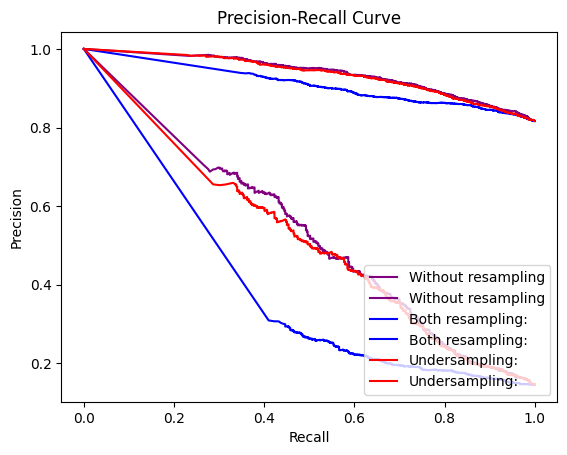

In [54]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import precision_recall_curve as prc
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.7)
pipeline = Pipeline(steps=[('o', over), ('u', under)])
print("Without resampling:")
for j in [0,1]:
    X_train, X_test, y_train, y_test = train_test_split(dfsvd, labeldf[label[j]], test_size=0.2, random_state=42)
    print(X_train.shape,y_train.shape)
    print(sum(y_train))
    #nb_model = GBC(learning_rate = 0.1)
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    # make predictions on the test data
    y_pred = nb_model.predict(X_test)
    y_score = nb_model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')


    print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")


    print(precision_score(y_test, y_pred), ": is the precision score")

    print(recall_score(y_test, y_pred), ": is the recall score")

    print(f1_score(y_test, y_pred), ": is the f1 score")

    ''' # Get the misclassified examples
    misclassified = X_test[y_pred != y_test]
    mis = misclassified.index.tolist()
    print(mis)'''
    # Print a few examples of misclassified comments
    '''for x in range(5):
        if x < len(mis): # Check if the index is within bounds
            predictor = df4[name].iloc[mis[x]]#[name[i]] # Replace 'comment' with the actual column name
            actual_label = labeldf[label[i]].iloc[mis[x]]#[label[j]] # Replace 'label' with the actual column name
            print(f"Predictor: {predictor}")
            print(f"Actual label: {actual_label}")
            print("\n")
        else:
            print("No more misclassified examples.")
            break'''

    probabilities = nb_model.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    print("auc",roc_auc)
    precision, recall, thresholds = prc(y_test,y_score)
    #create precision recall curve
    plt.plot(recall, precision, color='purple',label="Without resampling")
    plt.title('Precision-Recall Curve')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.legend(loc='lower right')
    '''fig, ax = plt.subplots()
    ax.plot(recall, precision, color='purple')

    #add axis labels to plot
    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')'''
    '''plt.show()
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label=label[j]+' AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')'''
#plt.show()

print("With Resampling:")
for j in [0,1]:
    X_train, X_test, y_train, y_test = train_test_split(dfsvd, labeldf[label[j]], test_size=0.2, random_state=42)
    X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)
    print(X_resampled.shape,y_resampled.shape)
    print(sum(y_resampled))
    #nb_model = GBC(learning_rate = 0.1)
    nb_model = GaussianNB()
    nb_model.fit(X_resampled, y_resampled)
    # make predictions on the test data
    y_pred = nb_model.predict(X_test)
    y_score = nb_model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')


    print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")


    print(precision_score(y_test, y_pred), ": is the precision score")

    print(recall_score(y_test, y_pred), ": is the recall score")

    print(f1_score(y_test, y_pred), ": is the f1 score")

    ''' # Get the misclassified examples
    misclassified = X_test[y_pred != y_test]
    mis = misclassified.index.tolist()
    print(mis)'''
    # Print a few examples of misclassified comments
    '''for x in range(5):
        if x < len(mis): # Check if the index is within bounds
            predictor = df4[name].iloc[mis[x]]#[name[i]] # Replace 'comment' with the actual column name
            actual_label = labeldf[label[i]].iloc[mis[x]]#[label[j]] # Replace 'label' with the actual column name
            print(f"Predictor: {predictor}")
            print(f"Actual label: {actual_label}")
            print("\n")
        else:
            print("No more misclassified examples.")
            break'''

    probabilities = nb_model.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    print("auc",roc_auc)
    precision, recall, thresholds = prc(y_test,y_score)
    #create precision recall curve
    #fig, ax = plt.subplots()
    plt.plot(recall, precision, color='blue',label="Both resampling:")
    plt.title('Precision-Recall Curve')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.legend(loc='lower right')
    #add axis labels to plot
    '''ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')'''
    '''plt.show()
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label=label[j]+' AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')'''
#plt.show()
print("test:")
under = RandomUnderSampler(sampling_strategy=0.7)
pipeline = Pipeline(steps=[('u', under)])
for j in [0,1]:
    X_train, X_test, y_train, y_test = train_test_split(dfsvd, labeldf[label[j]], test_size=0.2, random_state=42)
    X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)
    print(X_resampled.shape,y_resampled.shape)
    print(sum(y_resampled))
    #nb_model = GBC(learning_rate = 0.1)
    nb_model = GaussianNB()
    nb_model.fit(X_resampled, y_resampled)
    # make predictions on the test data
    y_pred = nb_model.predict(X_test)
    y_score = nb_model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')


    print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")


    print(precision_score(y_test, y_pred), ": is the precision score")

    print(recall_score(y_test, y_pred), ": is the recall score")

    print(f1_score(y_test, y_pred), ": is the f1 score")

    ''' # Get the misclassified examples
    misclassified = X_test[y_pred != y_test]
    mis = misclassified.index.tolist()
    print(mis)'''
    # Print a few examples of misclassified comments
    '''for x in range(5):
        if x < len(mis): # Check if the index is within bounds
            predictor = df4[name].iloc[mis[x]]#[name[i]] # Replace 'comment' with the actual column name
            actual_label = labeldf[label[i]].iloc[mis[x]]#[label[j]] # Replace 'label' with the actual column name
            print(f"Predictor: {predictor}")
            print(f"Actual label: {actual_label}")
            print("\n")
        else:
            print("No more misclassified examples.")
            break'''

    probabilities = nb_model.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    print("auc",roc_auc)
    precision, recall, thresholds = prc(y_test,y_score)
    #create precision recall curve
    plt.plot(recall, precision, color='red',label="Undersampling:")
    plt.title('Precision-Recall Curve')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.legend(loc='lower right')
    '''fig, ax = plt.subplots()
    ax.plot(recall, precision, color='purple')

    #add axis labels to plot
    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')'''
    '''plt.show()
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label=label[j]+' AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')'''
plt.show()

In [ ]:
#without NMF
X= pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,3642,3643,3644,3645,3646,3647,3648,3649,3650,3651
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
18720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.095956,0.0
18721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.116839,0.0,0.0,0.0,0.000000,0.0
18722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [51]:
#Without cross validation
npr.seed(123)
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
# perform encoding on training and testing dataset to differentiate between different labels and assign them to 0 or 1
for j in [0,1]:
    print(label[j])
    X_train, X_test, y_train, y_test = train_test_split(X, labeldf[label[j]], test_size=0.2, random_state=42)
    print(X_train.shape,y_train.shape)
    # create and fit the Naive Bayes model
    #nb_model = MultinomialNB()
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred = nb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')


    print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")


    print(precision_score(y_test, y_pred), ": is the precision score")

    print(recall_score(y_test, y_pred), ": is the recall score")

    print(f1_score(y_test, y_pred), ": is the f1 score")

    # Get the misclassified examples
    misclassified = X_test[y_pred != y_test]
    mis = misclassified.index.tolist()
    print(mis)
    # Print a few examples of misclassified comments
    for x in range(5):
        if x < len(mis): # Check if the index is within bounds
            predictor = df4[name].iloc[mis[x]]#[name[i]] # Replace 'comment' with the actual column name
            actual_label = labeldf[label[i]].iloc[mis[x]]#[label[j]] # Replace 'label' with the actual column name
            print(f"Predictor: {predictor}")
            print(f"Actual label: {actual_label}")
            print("\n")
        else:
            print("No more misclassified examples.")
            break

    probabilities = nb_model.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label=label[j]+' AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()

is_entertainment
(14979, 3652) (14979,)
Accuracy: 0.62
[[1894 1307]
 [ 113  431]] : is the confusion matrix
0.24798619102416572 : is the precision score
0.7922794117647058 : is the recall score
0.3777388255915864 : is the f1 score


AttributeError: 'numpy.ndarray' object has no attribute 'index'

is_entertainment
(14979, 3652) (14979,)
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
accuracy_score on test dataset :  0.8154873164218959
[[2510  691]
 [   0  544]] : is the confusion matrix
0.4404858299595142 : is the precision score
1.0 : is the recall score
0.6115795390668916 : is the f1 score
[5046, 4527, 6013, 2141, 8966, 10371, 13270, 7277, 5736, 17648, 6723, 15665, 12123, 6298, 2516, 11444, 1957, 17961, 11616, 11352, 10405, 15849, 17039, 3995, 3930, 5478, 6885, 5446, 14988, 828, 8573, 12166, 3526, 14671, 251, 12122, 13009, 17750, 13587, 9529, 4073, 1712, 7553, 7301, 15652, 2981, 11396, 12811, 9313, 13003, 18022, 5792, 10864, 18196, 7142, 2301, 15134, 3617, 12680, 17975, 3686, 8040, 4024, 2909, 17959, 16900, 1034, 16642, 14529, 15949, 12751, 16304, 736, 16006, 14781, 14323, 10146, 12923, 7270, 17777, 1290, 2518, 3532, 1297, 1429, 3798, 5115, 17702, 4981, 12349, 3919, 16089, 9859, 2605, 1611, 14438, 17705, 15879, 11233, 6466, 7039, 10885, 5000, 16881, 2308, 173

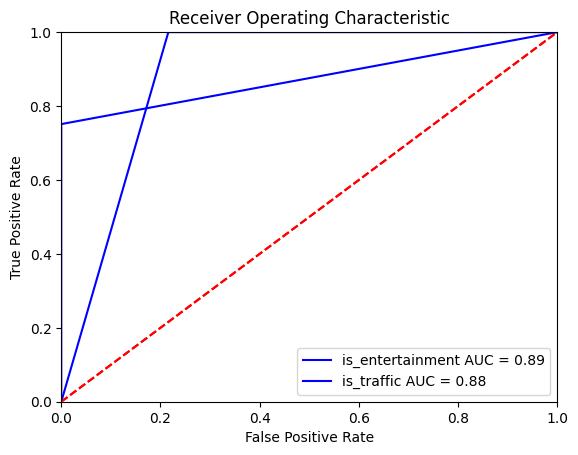

In [ ]:
#With Cross Validation
for j in [0,1]:
    print(label[j])
    X_train, X_test, y_train, y_test = train_test_split(X, labeldf[label[j]], test_size=0.2, random_state=42)
    print(X_train.shape,y_train.shape)
    # create and fit the Naive Bayes model
    #nb_model = MultinomialNB()
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred = nb_model.predict(X_test)
    '''
    param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
    }
    nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
    nbModel_grid.fit(X_train, y_train)
    print(nbModel_grid.best_estimator_)
    y_pred = nbModel_grid.predict(X_test)'''
    # calculate accuracy
    #accuracy = (y_pred == y_test).sum() / len(y_test)
    
    from sklearn.model_selection import RepeatedStratifiedKFold

    cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                        n_repeats=3, 
                                        random_state=999)
    from sklearn.preprocessing import PowerTransformer
    params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

    gs_NB = GridSearchCV(estimator=nb_model, 
                         param_grid=params_NB, 
                         cv=cv_method,
                         verbose=1, 
                         scoring='f1')

    Data_transformed = PowerTransformer().fit_transform(X_test)

    gs_NB.fit(Data_transformed, y_test);
    gs_NB.best_params_
    gs_NB.best_score_
    results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
    results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
    # predict the target on the test dataset
    predict_test = gs_NB.predict(Data_transformed)

    # Accuracy Score on test dataset
    accuracy_test = accuracy_score(y_test,predict_test)
    print('accuracy_score on test dataset : ', accuracy_test)
    
    print(confusion_matrix(y_test, predict_test), ": is the confusion matrix")
  

    print(precision_score(y_test, predict_test), ": is the precision score")

    print(recall_score(y_test, predict_test), ": is the recall score")

    print(f1_score(y_test, predict_test), ": is the f1 score")

    # Get the misclassified examples
    misclassified = X_test[predict_test != y_test]
    mis = misclassified.index.tolist()
    print(mis)
    # Print a few examples of misclassified comments
    for x in range(5):
        if x < len(mis): # Check if the index is within bounds
            predictor = df2[name].iloc[mis[x]]#[name[i]] # Replace 'comment' with the actual column name
            actual_label = labeldf[label[i]].iloc[mis[x]]#[label[j]] # Replace 'label' with the actual column name
            print(f"Predictor: {predictor}")
            print(f"Actual label: {actual_label}")
            print("\n")
        else:
            print("No more misclassified examples.")
            break

    probabilities = gs_NB.predict_proba(Data_transformed)
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label=label[j]+' AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()

In [17]:
#SVD without CV
num_topics = max(dic_comp,key=dic_comp.get)
svd = TruncatedSVD(n_components=num_topics)
svd.fit(X)
doc_topic_matrix = svd.transform(X)
topic_term_matrix = svd.components_
#See the first 10 examples of each feature
num_top_terms = 10
feature_names = tf_idf_model.get_feature_names_out()
'''for topic_idx, topic in enumerate(topic_term_matrix):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_terms - 1:-1]]))
    print()'''
dfsvd = pd.DataFrame(doc_topic_matrix)
npr.seed(123)
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
# perform encoding on training and testing dataset to differentiate between different labels and assign them to 0 or 1
for j in [0,1]:
    print(label[j])
    X_train, X_test, y_train, y_test = train_test_split(dfsvd, labeldf[label[j]], test_size=0.2, random_state=42)
    print(X_train.shape,y_train.shape)
    # create and fit the Naive Bayes model
    #nb_model = MultinomialNB()
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred = nb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')


    print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")


    print(precision_score(y_test, y_pred), ": is the precision score")

    print(recall_score(y_test, y_pred), ": is the recall score")

    print(f1_score(y_test, y_pred), ": is the f1 score")

    # Get the misclassified examples
    misclassified = X_test[y_pred != y_test]
    mis = misclassified.index.tolist()
    print(mis)
    # Print a few examples of misclassified comments
    '''for x in range(5):
        if x < len(mis): # Check if the index is within bounds
            predictor = df4[name].iloc[mis[x]]#[name[i]] # Replace 'comment' with the actual column name
            actual_label = labeldf[label[i]].iloc[mis[x]]#[label[j]] # Replace 'label' with the actual column name
            print(f"Predictor: {predictor}")
            print(f"Actual label: {actual_label}")
            print("\n")
        else:
            print("No more misclassified examples.")
            break'''

    probabilities = nb_model.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    print("auc",roc_auc)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label=label[j]+' AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'dic_comp' is not defined

is_entertainment
(14979, 1588) (14979,)
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
accuracy_score on test dataset :  0.7842456608811749
[[2513  688]
 [ 120  424]] : is the confusion matrix
0.381294964028777 : is the precision score
0.7794117647058824 : is the recall score
0.5120772946859904 : is the f1 score
is_traffic
(14979, 1588) (14979,)
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
accuracy_score on test dataset :  0.6966622162883845
[[ 465  222]
 [ 914 2144]] : is the confusion matrix
0.9061707523245984 : is the precision score
0.7011118378024853 : is the recall score
0.7905604719764012 : is the f1 score


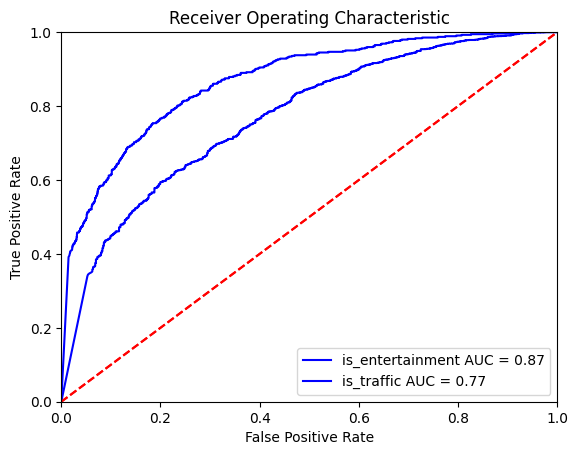

In [23]:
#nmf with CV
#With Cross Validation
for j in [0,1]:
    print(label[j])
    X_train, X_test, y_train, y_test = train_test_split(dfsvd, labeldf[label[j]], test_size=0.2, random_state=42)
    print(X_train.shape,y_train.shape)
    # create and fit the Naive Bayes model
    #nb_model = MultinomialNB()
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred = nb_model.predict(X_test)
    '''
    param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
    }
    nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
    nbModel_grid.fit(X_train, y_train)
    print(nbModel_grid.best_estimator_)
    y_pred = nbModel_grid.predict(X_test)'''
    # calculate accuracy
    #accuracy = (y_pred == y_test).sum() / len(y_test)
    
    from sklearn.model_selection import RepeatedStratifiedKFold

    cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                        n_repeats=3, 
                                        random_state=999)
    from sklearn.preprocessing import PowerTransformer
    params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

    gs_NB = GridSearchCV(estimator=nb_model, 
                         param_grid=params_NB, 
                         cv=cv_method,
                         verbose=1, 
                         scoring='f1')

    Data_transformed = PowerTransformer().fit_transform(X_test)

    gs_NB.fit(Data_transformed, y_test);
    gs_NB.best_params_
    gs_NB.best_score_
    results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
    results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
    # predict the target on the test dataset
    predict_test = gs_NB.predict(Data_transformed)

    # Accuracy Score on test dataset
    accuracy_test = accuracy_score(y_test,predict_test)
    print('accuracy_score on test dataset : ', accuracy_test)
    
    print(confusion_matrix(y_test, predict_test), ": is the confusion matrix")
  

    print(precision_score(y_test, predict_test), ": is the precision score")

    print(recall_score(y_test, predict_test), ": is the recall score")

    print(f1_score(y_test, predict_test), ": is the f1 score")

    ''' # Get the misclassified examples
    misclassified = X_test[predict_test != y_test]
    mis = misclassified.index.tolist()
    print(mis)'''
    # Print a few examples of misclassified comments
    '''for x in range(5):
        if x < len(mis): # Check if the index is within bounds
            predictor = df2[name].iloc[mis[x]]#[name[i]] # Replace 'comment' with the actual column name
            actual_label = labeldf[label[i]].iloc[mis[x]]#[label[j]] # Replace 'label' with the actual column name
            print(f"Predictor: {predictor}")
            print(f"Actual label: {actual_label}")
            print("\n")
        else:
            print("No more misclassified examples.")
            break'''

    probabilities = gs_NB.predict_proba(Data_transformed)
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label=label[j]+' AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()